In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/new_csv')

In [10]:
df.shape

(50000, 6)

In [11]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
32460,91531,181733,181734,How do I motivate myself?,How do I motivate myself for anything?,1
23316,300615,590401,590402,What are the best way to sustain your motivation?,What are the ways to sustain your motivation?,1
17109,227006,447389,447390,How can a houswife prepare for civil service?,How should I start my preparation for the IAS ...,0
28351,171977,339814,339815,What is the metric system?,What is metric system?,1
42909,249577,491397,491398,Which is the best company to hire dedicated an...,Which is the best company to hire dedicated io...,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     49999 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.3+ MB


In [13]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,1
is_duplicate,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,31682
1,18318


In [16]:
print('duplicate pairs percent',df[df['is_duplicate']==1].shape[0]/df.shape[0] * 100)
print('Not a duplicate pairs percent',df[df['is_duplicate']==0].shape[0]/df.shape[0] * 100)

duplicate pairs percent 36.636
Not a duplicate pairs percent 63.364


<Axes: xlabel='is_duplicate'>

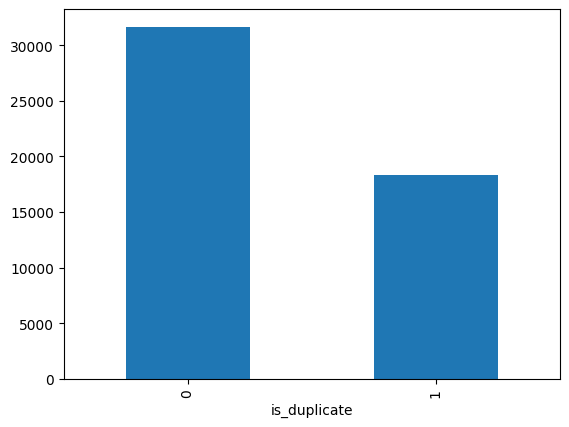

In [17]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
l=list(df['question1'])+list(df['question2'])

In [ ]:
len(l)

100000

In [ ]:
len(set(l))

89221

In [ ]:
print('number of unique questions(on words basis):',len(set(l)))

number of unique questions(on words basis): 89221


In [ ]:
print('number of same questions(on words basis):',len(l)-len(set(l)))

number of same questions(on words basis): 10779


In [18]:
df['question1']=df['question1'].str.lower()
df['question2']=df['question2'].str.lower()

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,333190,653321,653322,how do i move on from a girl who rejected me?,how should i get a girl who rejected me to lov...,0
1,44369,88357,88358,is donald trump an undercover democrat?,is hillary clinton secretly paying donald trum...,1
2,146950,290760,290761,which year is best for gate preparation?,how do i start preparing for gate 2017 me?,0
3,124460,246605,246606,what is the world's worst assault rifle?,what are the largest assault rifles?,0
4,70088,139307,139308,how can i speak fluent english and get confident?,how can i speak fluent english with confidence?,1


In [5]:
import numpy as np

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Combine and clean the questions
questions = list(df['question1'].fillna('')) + list(df['question2'].fillna(''))  # Fill NaN values with empty strings

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [20]:
temp_df1 = pd.DataFrame(q1_arr, index= df.index)
temp_df2 = pd.DataFrame(q2_arr, index= df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [21]:
temp_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
15022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17449,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_df.sample(6)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
29112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21590,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:],df.iloc[:,-1],test_size=0.2,random_state=1)

In [ ]:
temp_df.iloc[:,0:]

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7581

In [ ]:
len(cv.vocabulary_)

3000

In [24]:
sent1=input('enter question1:')
sent2=input('enter question2:')

enter question1:i am dhiraj
enter question2:myself dhiraj


In [32]:
sent1=input('enter question1:')
sent2=input('enter question2:')

# Transform each sentence separately
q1_arr = cv.transform([sent1.lower()]).toarray()
q2_arr = cv.transform([sent2.lower()]).toarray()

# Concatenate the feature vectors
new_l = np.concatenate((q1_arr, q2_arr), axis=1)

# Make predictions
rf.predict(new_l)

enter question1:i am dhiraj
enter question2:myself dhiraj


array([0])

In [29]:
l=np.array([sent1.lower(),sent2.lower()])

In [30]:
new_l=cv.transform(l).toarray()

In [31]:
new_l.shape

(2, 3000)

In [27]:
rf.predict(new_l)

ValueError: X has 3000 features, but RandomForestClassifier is expecting 6000 features as input.